In [1]:
import sys
sys.path.append('..')

In [2]:
import os
import pickle
from collections import OrderedDict

import numpy as np
import pandas as pd
import scipy as sp

# import tensorflow as tf
# from tensorflow.keras import Model, Input, losses, layers, optimizers

from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from matplotlib import pyplot as plt
from matplotlib.colors import BoundaryNorm
import seaborn as sns

import itertools

from src.datasets import adults
from src.evaluation import data_benchmark
# from src.models import vae_keras
# from src.datasets import adults#, dataset_utils

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Load the original data

In [3]:
# Load original data for comparisons
all_data, enc_dict, dec_dict, Scaler, cont_cols, cat_cols = adults.load_adults_data()

# rename it
data_orig = all_data.copy()
print(data_orig)
print(data_orig['income'].value_counts())

using original adult dataset
            age  workclass    fnlwgt  education  education-num  \
0      0.301370          7  0.044302          9       0.800000   
1      0.452055          6  0.048238          9       0.800000   
2      0.287671          4  0.138113         11       0.533333   
3      0.493151          4  0.151068          1       0.400000   
4      0.150685          4  0.221488          9       0.800000   
...         ...        ...       ...        ...            ...   
32556  0.136986          4  0.166404          7       0.733333   
32557  0.315068          4  0.096500         11       0.533333   
32558  0.561644          4  0.094827         11       0.533333   
32559  0.068493          4  0.128499         11       0.533333   
32560  0.479452          5  0.187203         11       0.533333   

       marital-status  occupation  relationship  race  sex  capital-gain  \
0                   4           1             1     4    1      0.021740   
1                   2     

# Load the synthetic data (vanilla) and run the evaluation on the vanilla synthetic data

using given synthetic adult dataset

1-TVD (Ind)
0.8301830419810422

1-TVD (Pair)
0.6785034643843879


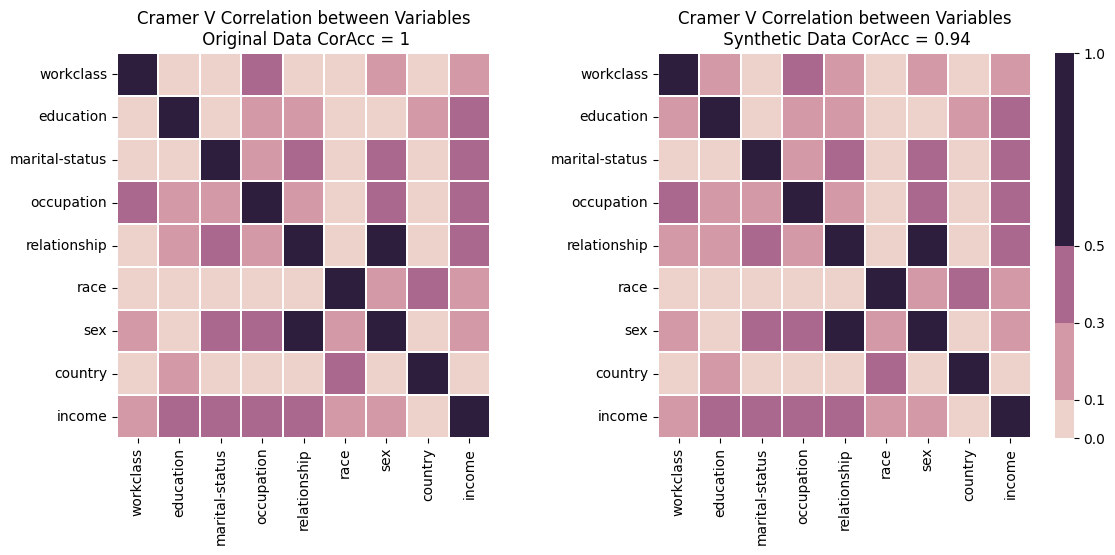


Original data F1 macro score:
Accuracy: 90.43%
F1: 86.30%

Synthetic data F1 macro score:
Accuracy: 83.13%
F1: 73.35%


In [35]:
x_cat = np.load('../exp/adult/vanilla/5/X_cat_train.npy', allow_pickle=True)
x_num = np.load('../exp/adult/vanilla/5/X_num_train.npy', allow_pickle=True)
y = np.load('../exp/adult/vanilla/5/y_train.npy', allow_pickle=True)
y = y.reshape(-1,1)

x_train = np.concatenate([x_cat, y], axis=1)
data_synth = np.concatenate([x_train, x_num], axis=1)
data_synth = pd.DataFrame(data_synth, columns=cat_cols+cont_cols)

# preprocess data produced from DM to match the original dataset, for evaluation

# income needs to be transformed to strings to match original raw adult set
map_dict = {1: '>50K', 0: '<=50K'}
data_synth['income'] = data_synth['income'].map(map_dict)

# apply same preprocessing as is applied to original raw adult set
data_synth, enc_dict_synth, dec_dict_synth, Scaler_synth, cont_cols, cat_cols = adults.load_adults_data(raw_input_data=data_synth)

# align columns with original dataset
data_orig, data_synth = data_orig.align(data_synth, join="left", axis=1)

# evaluate
data_benchmark.evaluate_synthetic_data(data_orig, data_synth, cont_cols, cat_cols, [1,1,1,1])

# Load the synthetic dataset (DP) and run the evaluation on the dp synthetic data

using given synthetic adult dataset

1-TVD (Ind)
0.4764612579533516

1-TVD (Pair)
0.223995347834546


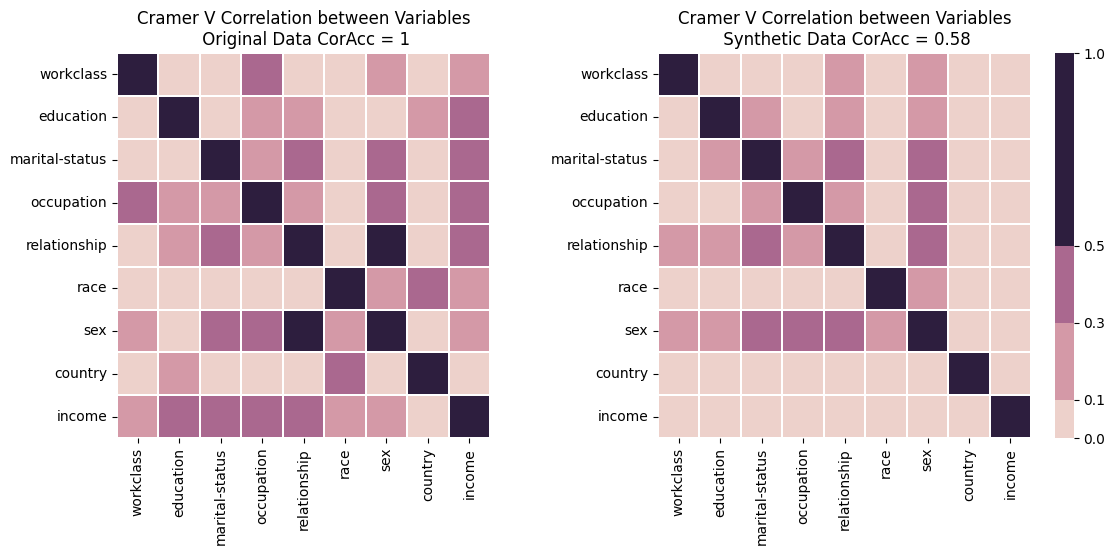


Original data F1 macro score:
Accuracy: 90.43%
F1: 86.30%

Synthetic data F1 macro score:
Accuracy: 62.64%
F1: 50.36%


In [32]:
x_cat = np.load('../exp/adult/dp/5-e500s0.2/X_cat_train.npy', allow_pickle=True)
x_num = np.load('../exp/adult/dp/5-e500s0.2/X_num_train.npy', allow_pickle=True)
y = np.load('../exp/adult/dp/5-e500s0.2/y_train.npy', allow_pickle=True)
y = y.reshape(-1,1)

x_train = np.concatenate([x_cat, y], axis=1)
data_synth_dp = np.concatenate([x_train, x_num], axis=1)
data_synth_dp = pd.DataFrame(data_synth_dp, columns=cat_cols+cont_cols)

# preprocess data produced from DM to match the original dataset, for evaluation

# income needs to be transformed to strings to match original raw adult set
map_dict = {1: '>50K', 0: '<=50K'}
data_synth_dp['income'] = data_synth_dp['income'].map(map_dict)

# apply same preprocessing as is applied to original raw adult set
data_synth_dp, enc_dict_synth, dec_dict_synth, Scaler_synth, cont_cols, cat_cols = adults.load_adults_data(raw_input_data=data_synth_dp)    

# align columns with original dataset
data_orig, data_synth_dp = data_orig.align(data_synth_dp, join="left", axis=1)

# evaluate
data_benchmark.evaluate_synthetic_data(data_orig, data_synth_dp, cont_cols, cat_cols, [1,1,1,1])

using given synthetic adult dataset

1-TVD (Ind)
0.4768174791978672

1-TVD (Pair)
0.23039116643596513


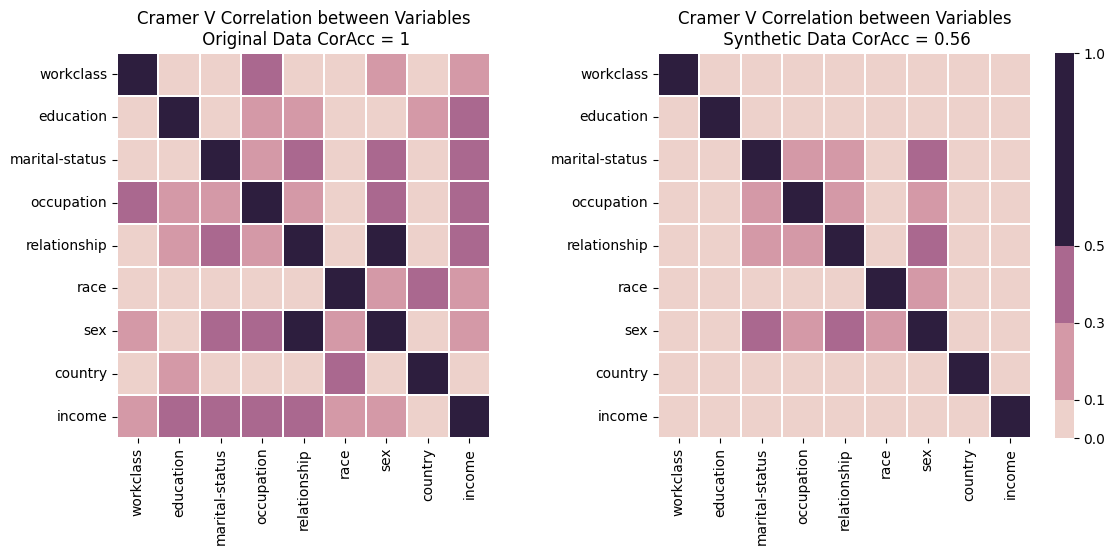


Original data F1 macro score:
Accuracy: 90.43%
F1: 86.30%

Synthetic data F1 macro score:
Accuracy: 68.11%
F1: 50.47%


In [18]:
x_cat = np.load('../exp/adult/dp/6-e100s0.34/X_cat_train.npy', allow_pickle=True)
x_num = np.load('../exp/adult/dp/6-e100s0.34/X_num_train.npy', allow_pickle=True)
y = np.load('../exp/adult/dp/6-e100s0.34/y_train.npy', allow_pickle=True)
y = y.reshape(-1,1)

x_train = np.concatenate([x_cat, y], axis=1)
data_synth_dp = np.concatenate([x_train, x_num], axis=1)
data_synth_dp = pd.DataFrame(data_synth_dp, columns=cat_cols+cont_cols)

# preprocess data produced from DM to match the original dataset, for evaluation

# income needs to be transformed to strings to match original raw adult set
map_dict = {1: '>50K', 0: '<=50K'}
data_synth_dp['income'] = data_synth_dp['income'].map(map_dict)

# apply same preprocessing as is applied to original raw adult set
data_synth_dp, enc_dict_synth, dec_dict_synth, Scaler_synth, cont_cols, cat_cols = adults.load_adults_data(raw_input_data=data_synth_dp)    

# align columns with original dataset
data_orig, data_synth_dp = data_orig.align(data_synth_dp, join="left", axis=1)

# evaluate
data_benchmark.evaluate_synthetic_data(data_orig, data_synth_dp, cont_cols, cat_cols, [1,1,1,1])

using given synthetic adult dataset

1-TVD (Ind)
0.48057409629833303

1-TVD (Pair)
0.2307354625735415


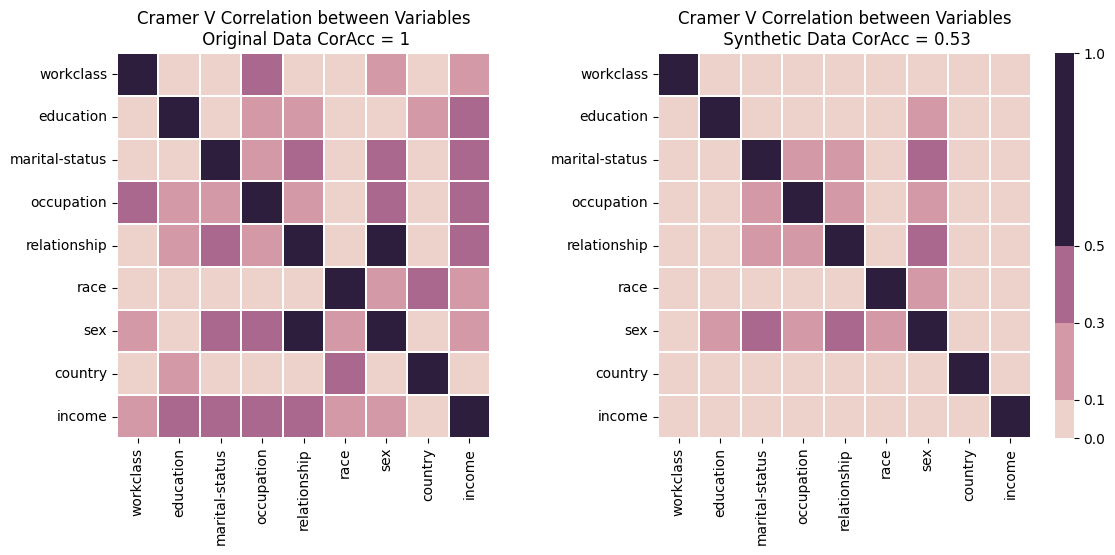


Original data F1 macro score:
Accuracy: 90.43%
F1: 86.30%

Synthetic data F1 macro score:
Accuracy: 67.57%
F1: 51.49%


In [19]:
x_cat = np.load('../exp/adult/dp/7-e50s0.42/X_cat_train.npy', allow_pickle=True)
x_num = np.load('../exp/adult/dp/7-e50s0.42/X_num_train.npy', allow_pickle=True)
y = np.load('../exp/adult/dp/7-e50s0.42/y_train.npy', allow_pickle=True)
y = y.reshape(-1,1)

x_train = np.concatenate([x_cat, y], axis=1)
data_synth_dp = np.concatenate([x_train, x_num], axis=1)
data_synth_dp = pd.DataFrame(data_synth_dp, columns=cat_cols+cont_cols)

# preprocess data produced from DM to match the original dataset, for evaluation

# income needs to be transformed to strings to match original raw adult set
map_dict = {1: '>50K', 0: '<=50K'}
data_synth_dp['income'] = data_synth_dp['income'].map(map_dict)

# apply same preprocessing as is applied to original raw adult set
data_synth_dp, enc_dict_synth, dec_dict_synth, Scaler_synth, cont_cols, cat_cols = adults.load_adults_data(raw_input_data=data_synth_dp)    

# align columns with original dataset
data_orig, data_synth_dp = data_orig.align(data_synth_dp, join="left", axis=1)

# evaluate
data_benchmark.evaluate_synthetic_data(data_orig, data_synth_dp, cont_cols, cat_cols, [1,1,1,1])

using given synthetic adult dataset

1-TVD (Ind)
0.4825189793790555

1-TVD (Pair)
0.2319675212944048


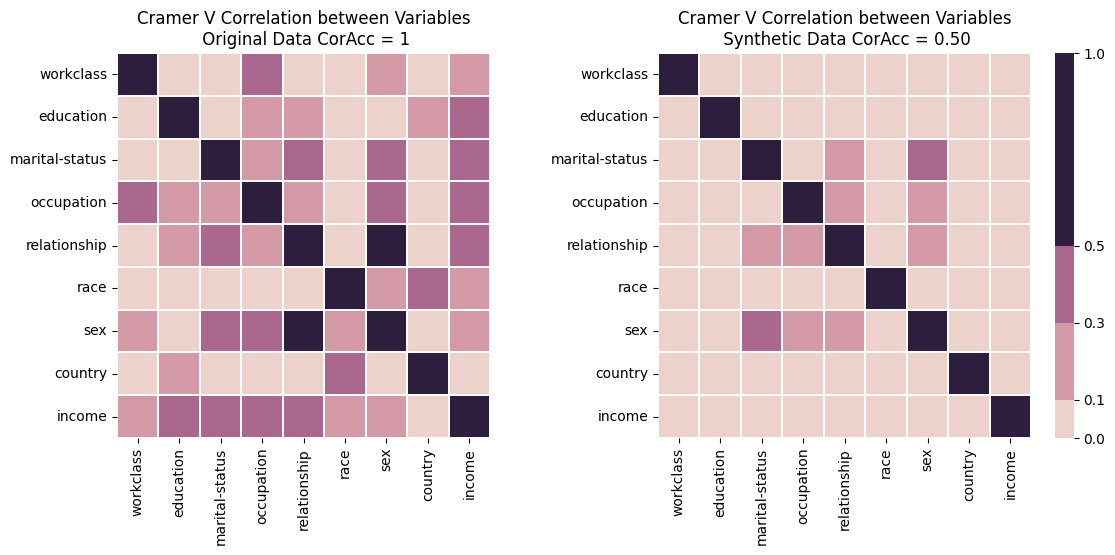


Original data F1 macro score:
Accuracy: 90.43%
F1: 86.30%

Synthetic data F1 macro score:
Accuracy: 50.12%
F1: 47.10%


In [37]:
x_cat = np.load('../exp/adult/dp/8-e10s0.66/X_cat_train.npy', allow_pickle=True)
x_num = np.load('../exp/adult/dp/8-e10s0.66/X_num_train.npy', allow_pickle=True)
y = np.load('../exp/adult/dp/8-e10s0.66/y_train.npy', allow_pickle=True)
y = y.reshape(-1,1)

x_train = np.concatenate([x_cat, y], axis=1)
data_synth_dp = np.concatenate([x_train, x_num], axis=1)
data_synth_dp = pd.DataFrame(data_synth_dp, columns=cat_cols+cont_cols)

# preprocess data produced from DM to match the original dataset, for evaluation

# income needs to be transformed to strings to match original raw adult set
map_dict = {1: '>50K', 0: '<=50K'}
data_synth_dp['income'] = data_synth_dp['income'].map(map_dict)

# apply same preprocessing as is applied to original raw adult set
data_synth_dp, enc_dict_synth, dec_dict_synth, Scaler_synth, cont_cols, cat_cols = adults.load_adults_data(raw_input_data=data_synth_dp)    

# align columns with original dataset
data_orig, data_synth_dp = data_orig.align(data_synth_dp, join="left", axis=1)

# evaluate
data_benchmark.evaluate_synthetic_data(data_orig, data_synth_dp, cont_cols, cat_cols, [1,1,1,1])

using given synthetic adult dataset

1-TVD (Ind)
0.5000743795080289

1-TVD (Pair)
0.2403783956228791


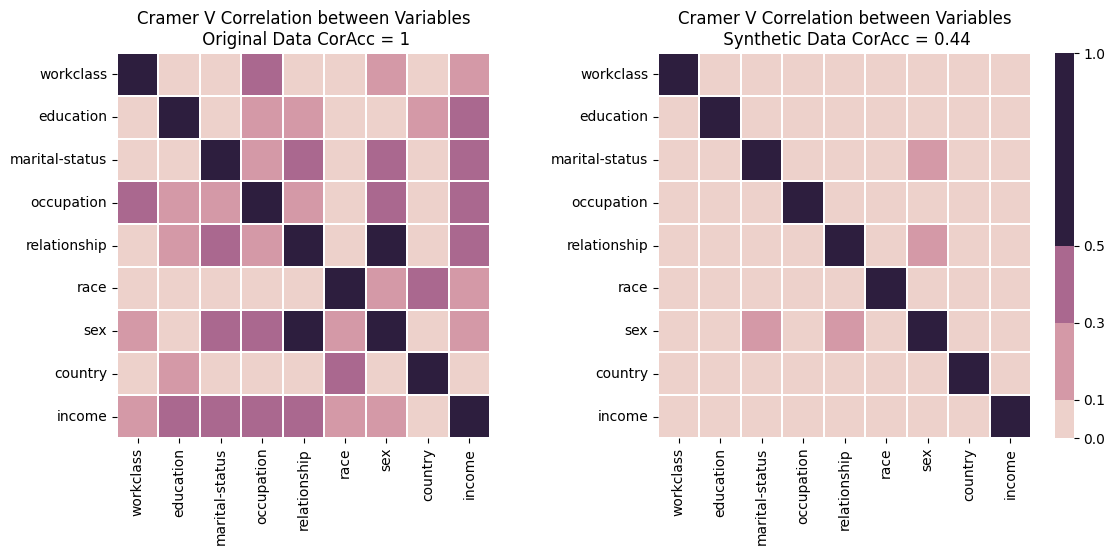


Original data F1 macro score:
Accuracy: 90.43%
F1: 86.30%

Synthetic data F1 macro score:
Accuracy: 69.10%
F1: 46.15%


In [28]:
x_cat = np.load('../exp/adult/dp/9-e1s2.58/X_cat_train.npy', allow_pickle=True)
x_num = np.load('../exp/adult/dp/9-e1s2.58/X_num_train.npy', allow_pickle=True)
y = np.load('../exp/adult/dp/9-e1s2.58/y_train.npy', allow_pickle=True)
y = y.reshape(-1,1)

x_train = np.concatenate([x_cat, y], axis=1)
data_synth_dp = np.concatenate([x_train, x_num], axis=1)
data_synth_dp = pd.DataFrame(data_synth_dp, columns=cat_cols+cont_cols)

# preprocess data produced from DM to match the original dataset, for evaluation

# income needs to be transformed to strings to match original raw adult set
map_dict = {1: '>50K', 0: '<=50K'}
data_synth_dp['income'] = data_synth_dp['income'].map(map_dict)

# apply same preprocessing as is applied to original raw adult set
data_synth_dp, enc_dict_synth, dec_dict_synth, Scaler_synth, cont_cols, cat_cols = adults.load_adults_data(raw_input_data=data_synth_dp)    

# align columns with original dataset
data_orig, data_synth_dp = data_orig.align(data_synth_dp, join="left", axis=1)

# evaluate
data_benchmark.evaluate_synthetic_data(data_orig, data_synth_dp, cont_cols, cat_cols, [1,1,1,1])